<a href="https://colab.research.google.com/github/MariaCarolinass/computacao-numerica/blob/main/taxajuros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Análise de dois planos de investimento pela taxa de juros:

In [6]:
def f1(j):
  return 1 - (1 + j) ** - 24 - (33.000 / 1.976) * j

def f2(j):
  return 1 - (1 + j) ** - 36 - (33.000 / 1.715) * j

Verificando o gráfico das funções:

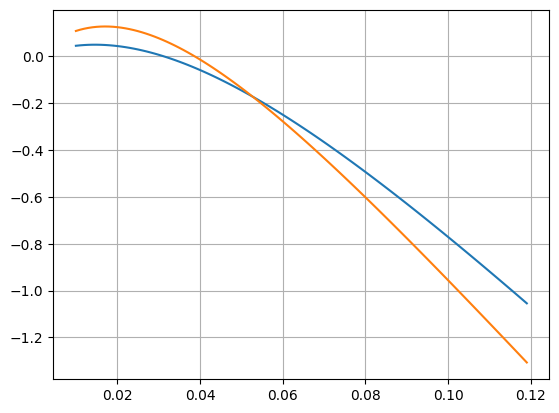

In [7]:
j = np.arange(0.01, 0.12, 0.001)
plt.plot(j, f1(j))
plt.plot(j, f2(j))
plt.grid()
plt.show()

Novo gráfico que melhor corresponde o intervalo da raiz:

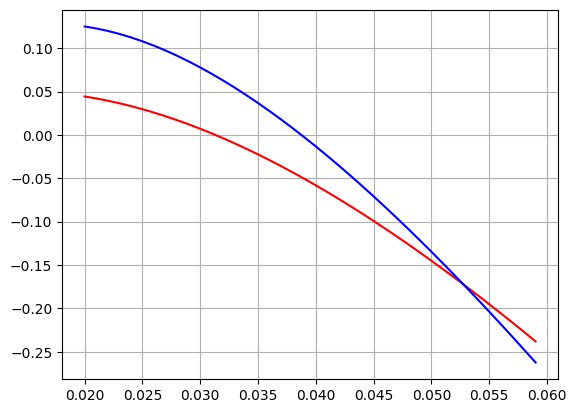

In [5]:
j = np.arange(0.02, 0.06, 0.001)
plt.plot(j, f1(j), color='red')
plt.plot(j, f2(j), color='blue')
plt.grid()
plt.show()

Calculando as raízes para as funções f1(j) e f2(j):

In [17]:
def df1(x):
  return (24 / (1 + x) ** 25) - (4125 / 247)

def df2(x):
  return (36 / (1 + x) ** 37) - (6600 / 343)

def newton1(x0, erro, itMax):
  it = 0
  erro_relativo = 1
  x = x0

  while (erro_relativo >= erro and it < itMax):
    xOld = x
    x = x - f1(x) / df1(x)
    erro_relativo = abs((x - xOld) / x)

    it += 1

  return (x, erro_relativo, it)

def newton2(x0, erro, itMax):
  it = 0
  erro_relativo = 1
  x = x0

  while (erro_relativo >= erro and it < itMax):
    xOld = x
    x = x - f2(x) / df2(x)
    erro_relativo = abs((x - xOld) / x)

    it += 1

  return (x, erro_relativo, it)

x0 = 0.03
erro = 10 ** -4
itMax = 8

# Plano 1
res1 = newton1(x0, erro, itMax)

print(f"O valor da raíz no Plano 1é: {res1[0]:.4f}")
print(f"O erro relativo foi: {res1[1]:.4f}")
print(f"O número de iterações realizadas foi: {res1[2]}")
print()

# Plano 2
res2 = newton2(x0, erro, itMax)

print(f"O valor da raíz no Plano 2 é: {res2[0]:.4f}")
print(f"O erro relativo foi: {res2[1]:.4f}")
print(f"O número de iterações realizadas foi: {res2[2]}")

O valor da raíz no Plano 1é: 0.0313
O erro relativo foi: 0.0000
O número de iterações realizadas foi: 3

O valor da raíz no Plano 2 é: 0.0387
O erro relativo foi: 0.0000
O número de iterações realizadas foi: 4


Verificando a raiz do Plano 1 para os quatro métodos numéricos:

In [16]:
def bisseccao(a, b, erro, itMax):
  it = 0
  erro_relativo = 1
  x = a

  while (erro_relativo >= erro and it < itMax):
    xOld = x
    x = (a + b) / 2
    erro_relativo = abs((x - xOld) / x)

    if f1(a) * f1(x) < 0:
      b = x
    else:
      a = x

    it += 1

  return (x, erro_relativo, it)

def falsa_posicao(a, b, erro, itMax):
  it = 0
  erro_relativo = 1
  x = a

  while (erro_relativo >= erro and it < itMax):
    xOld = x
    x = a - f1(a) * (b - a) / (f1(b) - f1(a))
    erro_relativo = abs((x - xOld) / x)

    if f1(a) * f1(x) < 0:
      b = x
    else:
      a = x

    it += 1

  return (x, erro_relativo, it)

def df(x):
  return (24 / (1 + x) ** 25) - (4125 / 247)

def newton(x0, erro, itMax):
  it = 0
  erro_relativo = 1
  x = x0

  while (erro_relativo >= erro and it < itMax):
    xOld = x
    x = x - f1(x) / df(x)
    erro_relativo = abs((x - xOld) / x)

    it += 1

  return (x, erro_relativo, it)

def secante(x0, x1, erro, itMax):
  it = 0
  erro_relativo = 1
  xa1 = x0
  x = x1

  while (erro_relativo >= erro and it < itMax):
    xa2 = xa1
    xa1 = x
    x = xa1 - f1(xa1) * (xa2 - xa1) / (f1(xa2) - f1(xa1))
    erro_relativo = abs((x - xa1) / x)

    it += 1

  return (x, erro_relativo, it)

bisseccao = bisseccao(0.02, 0.06, 10 ** -4, 16)
falsa_posicao = falsa_posicao(0.02, 0.06, 10 ** -4, 16)
newton = newton(0.03, 10 ** -4, 16)
secante = secante(0.02, 0.03, 10 ** -4, 16)

print(f"A raíz da bisseccao é: {bisseccao[0]:.4f}")
print(f"O erro relativo foi: {bisseccao[1]:.4f}")
print(f"O número de iterações realizadas foi: {bisseccao[2]}")
print()

print(f"A raíz da falsa posição é: {falsa_posicao[0]:.4f}")
print(f"O erro relativo foi: {falsa_posicao[1]:.4f}")
print(f"O número de iterações realizadas foi: {falsa_posicao[2]}")
print()

print(f"A raíz da newton é: {newton[0]:.4f}")
print(f"O erro relativo foi: {newton[1]:.4f}")
print(f"O número de iterações realizadas foi: {newton[2]}")
print()

print(f"A raíz da secante é: {secante[0]:.4f}")
print(f"O erro relativo foi: {secante[1]:.4f}")
print(f"O número de iterações realizadas foi: {secante[2]}")

A raíz da bisseccao é: 0.0313
O erro relativo foi: 0.0001
O número de iterações realizadas foi: 14

A raíz da falsa posição é: 0.0313
O erro relativo foi: 0.0001
O número de iterações realizadas foi: 9

A raíz da newton é: 0.0313
O erro relativo foi: 0.0000
O número de iterações realizadas foi: 3

A raíz da secante é: 0.0313
O erro relativo foi: 0.0000
O número de iterações realizadas foi: 4
